In [1]:
#Primary architectiure is derived from: https://github.com/akmadan/Emotion_Detection_CNN/blob/main/emotion-classification-cnn-using-keras.ipynb


#These are for data analysis and visualizaiton
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os #so we can manipulate files



# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array #for image importing
from keras.preprocessing.image import ImageDataGenerator
#import libraries that make up our layers in the CNN
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential #to instatiate the CNN model
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [2]:
picture_size = 48
#define file path
folder_path = "../input/face-expression-recognition-dataset/images/"

We should make sure that all of our data was imported correctly on Kaggle

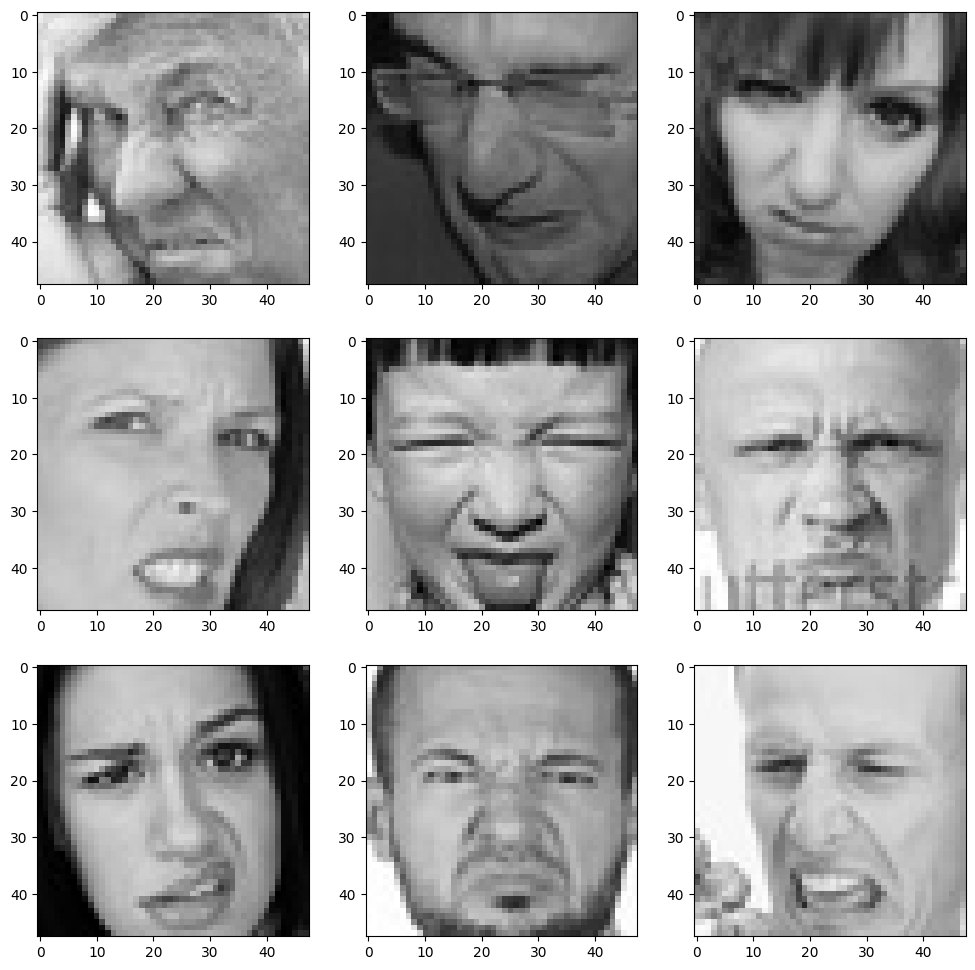

In [3]:
expression = 'disgust'
plt.style.use('default')

#display the images of 'disgust'
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()


In [4]:
#Size of the number of training examples (images) per iteration
batch_size  = 128

#ImageDataGenerator() -> generates batches of tensor image data with real time data augemntation
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator() #needed since the 

#flow_from_directory -> data that is present in this directory, divides the data into segments for training
train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)
#The function also reshapes the data, performs one hot encoding and shffules data


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)




Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [5]:
print(type(train_set[0][0][0]))
train_set[0][0].shape
train_set[0][0][0].shape

<class 'numpy.ndarray'>


(48, 48, 1)

In [6]:
#from tensorflow.keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential() #instantiate the model
#1st CNN layer
#kernel size will be 64 filters
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1))) #convolutional filter is (3,3)
model.add(BatchNormalization())
model.add(Activation('relu')) #essnentially decides which data should be passed on to next layer
model.add(MaxPooling2D(pool_size = (2,2))) #extracts the important data from the feature map
model.add(Dropout(0.25)) #prevent overfitting so want to drop parts of the data

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten()) #collapses the size of the input to a 1D array
#makes it much easier to feed into a model (in this case a fully connected layer)

#Fully connected 1st layer
model.add(Dense(256)) #connect all of the layers using dense (AKA a feed forward neural network)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(no_of_classes, activation='softmax'))


'''Learning rate:
The learning rate controls how quickly the model is adapted to the problem. 
Smaller learning rates require more training epochs given the smaller changes made to 
the weights each update, whereas larger learning rates result in rapid changes 
and require fewer training epochs.
'''

opt = Adam(learning_rate = 0.0001) #define the Adam optimizer with learning rate = 0.0001
#article on categorical cross entropy: https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy#:~:text=Categorical%20crossentropy%20is%20a%20loss,difference%20between%20two%20probability%20distributions.
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary() 

2022-04-14 01:34:00.350972: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 01:34:00.451126: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 01:34:00.451881: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 01:34:00.452971: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

Now let's take a moment to analyze the individual layers and see what they look like under the hood.

In [7]:
layer = model.layers
filters = model.layers[1].get_weights()
#print(layer[1].name,filters.shape)

In [8]:
#from keras.optimizers import RMSprop,SGD,Adam

#import the callbacks packages from keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#checks model for a specific condition and will save weights and biases at a certain frequency
#in this case we are monitoring validation accuracy
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
'''
save_best_only: if save_best_only=True, it only saves when the model is considered the 
"best" and the latest best model according to the quantity monitored will not be 
overwritten. If filepath doesn't contain formatting options like {epoch} then filepath 
will be overwritten by each new better model.
'''


#if we are getting the best model such that the model accuracy is not increasing, we stop training
#this is to prevent overfitting 
early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

#if the currernt learning rate is not able to learn effectively, we reduce it
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)
#factor: factor by which the learning rate will be reduced. new_lr = lr * factor.
#patience: number of epochs with no improvement after which learning rate will be reduced.
#threshold for measuring the new optimum, to only focus on significant changes.


callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(optimizer= Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [9]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

score = model.evaluate(train_set,verbose=0)
print('Testing loss:',score[0],'\n',
       'Testing accuracy', score[1])

'''
score = model.evaluate(train_set,verbose=0)
print('Testing loss:',score[0],'\n',
       'Testing accuracy', score[1])

#from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])
'''

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-04-14 01:34:03.250608: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/48


2022-04-14 01:34:05.645452: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


225/225 [==============================] - 112s 464ms/step - loss: 1.7824 - accuracy: 0.3114 - val_loss: 1.8546 - val_accuracy: 0.3372
Epoch 2/48
225/225 [==============================] - 26s 115ms/step - loss: 1.4374 - accuracy: 0.4504 - val_loss: 1.4378 - val_accuracy: 0.4447
Epoch 3/48
225/225 [==============================] - 27s 119ms/step - loss: 1.2791 - accuracy: 0.5087 - val_loss: 1.2688 - val_accuracy: 0.5190
Epoch 4/48
225/225 [==============================] - 27s 121ms/step - loss: 1.1886 - accuracy: 0.5437 - val_loss: 1.4228 - val_accuracy: 0.4391
Epoch 5/48
225/225 [==============================] - 27s 122ms/step - loss: 1.1276 - accuracy: 0.5716 - val_loss: 1.3013 - val_accuracy: 0.5188
Epoch 6/48
225/225 [==============================] - 27s 120ms/step - loss: 1.0749 - accuracy: 0.5908 - val_loss: 1.1767 - val_accuracy: 0.5425
Epoch 7/48
225/225 [==============================] - 27s 118ms/step - loss: 1.0314 - accuracy: 0.6099 - val_loss: 1.1233 - val_accuracy: 0.

'\nscore = model.evaluate(train_set,verbose=0)\nprint(\'Testing loss:\',score[0],\'\n\',\n       \'Testing accuracy\', score[1])\n\n#from keras.optimizers import RMSprop,SGD,Adam\nfrom keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau\n\ncheckpoint = ModelCheckpoint("./model.h5", monitor=\'val_acc\', verbose=1, save_best_only=True, mode=\'max\')\n\nearly_stopping = EarlyStopping(monitor=\'val_loss\',\n                          min_delta=0,\n                          patience=3,\n                          verbose=1,\n                          restore_best_weights=True\n                          )\n\nreduce_learningrate = ReduceLROnPlateau(monitor=\'val_loss\',\n                              factor=0.2,\n                              patience=3,\n                              verbose=1,\n                              min_delta=0.0001)\n\ncallbacks_list = [early_stopping,checkpoint,reduce_learningrate]\n\nepochs = 48\n\nmodel.compile(loss=\'categorical_crossentropy\

This code will take quite a while to execute so bear with it. Once it finishes running we will get the model.h5 file in the /kaggle/working directory.

Plotting the accuracy and the loss.

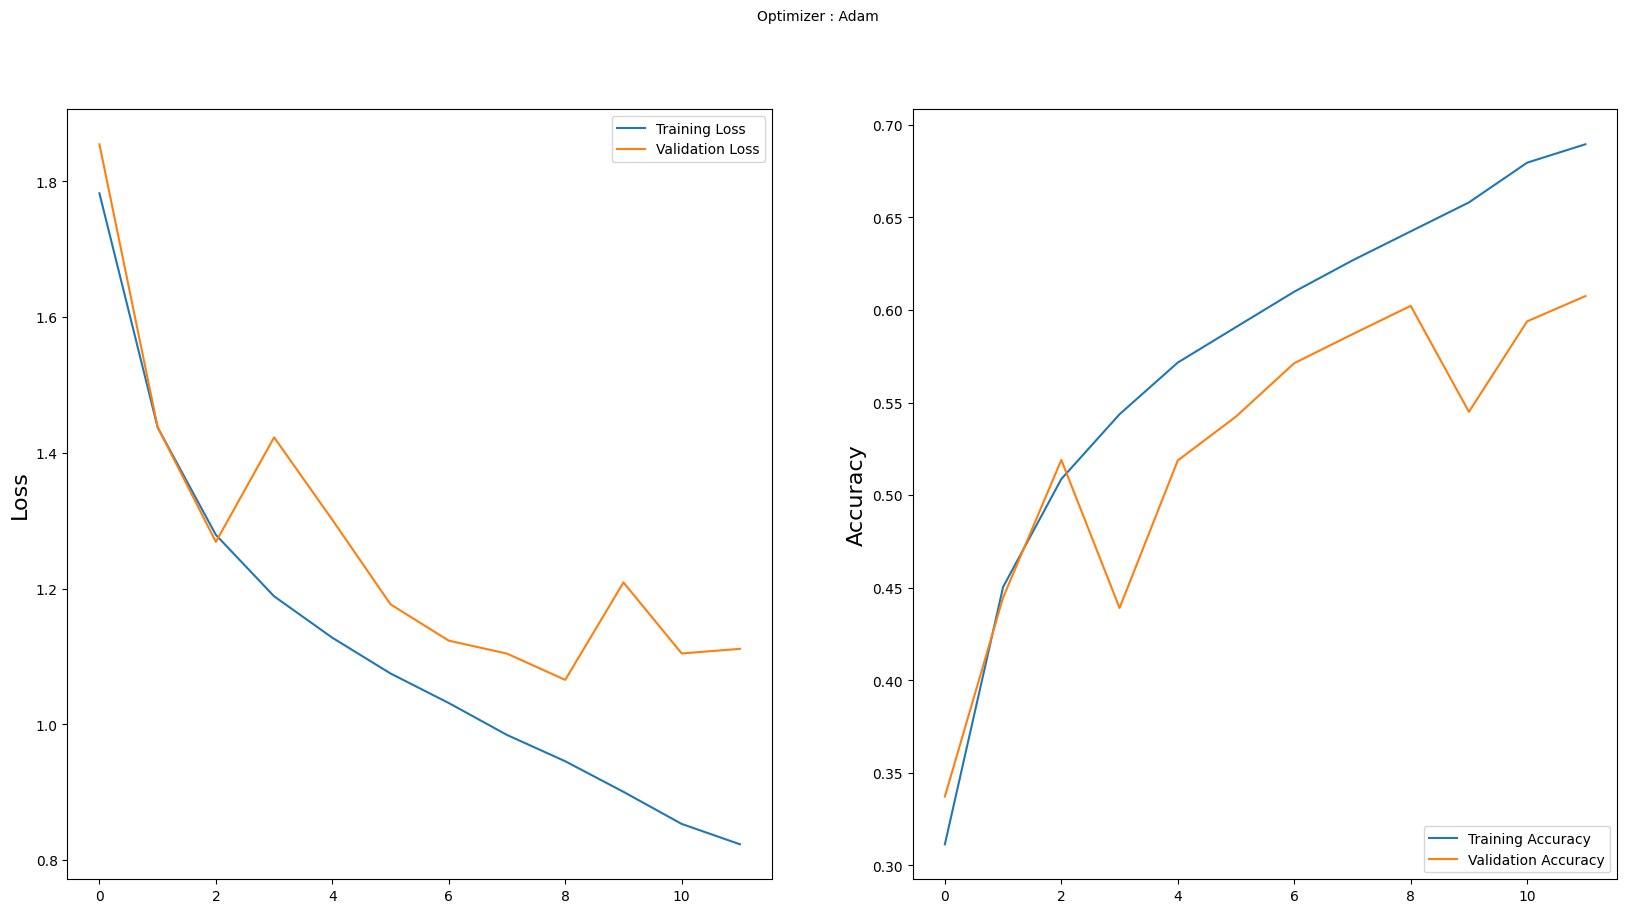

In [10]:
plt.style.use('default')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [11]:
#save the model as an h5 file
model.save('model.h5')

'''
#test image
import cv2
test_img = cv2.imread('../input/dababy/mad1.jpeg', 0)
test_img = cv2.resize(test_img, (48,48))
test_img.shape
test_img = test_img.reshape(1,48,48,1)
test_img.shape
plt.imshow(test_img.reshape(48,48), cmap='gray')

batch_size = 64
hist = model.fit(train_set,epochs=epochs,batch_size=batch_size,shuffle=True,validation_split=0.2)
'''

"\n#test image\nimport cv2\ntest_img = cv2.imread('../input/dababy/mad1.jpeg', 0)\ntest_img = cv2.resize(test_img, (48,48))\ntest_img.shape\ntest_img = test_img.reshape(1,48,48,1)\ntest_img.shape\nplt.imshow(test_img.reshape(48,48), cmap='gray')\n\nbatch_size = 64\nhist = model.fit(train_set,epochs=epochs,batch_size=batch_size,shuffle=True,validation_split=0.2)\n"

In [12]:
'''
#attempt prediciton
label_map = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']
pred = model.predict(test_img)
print(pred)
emo_num = np.argmax(pred[0])
#print(emo_num)
MAX = pred[0][emo_num]
print('confidence level: ', MAX)
print("The subject's emotion is: ",label_map[emo_num])

history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )
                                '''

'\n#attempt prediciton\nlabel_map = [\'Angry\',\'Disgust\',\'Fear\',\'Happy\',\'Neutral\', \'Sad\', \'Surprise\']\npred = model.predict(test_img)\nprint(pred)\nemo_num = np.argmax(pred[0])\n#print(emo_num)\nMAX = pred[0][emo_num]\nprint(\'confidence level: \', MAX)\nprint("The subject\'s emotion is: ",label_map[emo_num])\n\nhistory = model.fit_generator(generator=train_set,\n                                steps_per_epoch=train_set.n//train_set.batch_size,\n                                epochs=epochs,\n                                validation_data = test_set,\n                                validation_steps = test_set.n//test_set.batch_size,\n                                callbacks=callbacks_list\n                                )\n                                '

In [13]:
label_map = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

In [14]:
import cv2
#function to prepare images for the model
def import_img(path):
    im = cv2.imread(path,0)
    im = cv2.resize(im,(48,48))
    im = im.reshape(1,48,48,1)
               
    return im




In [15]:
def Predict(img,model):
    
    pred = model.predict(img)
    print(pred[0])
    emo_num = np.argmax(pred[0])
    MAX = pred[0][emo_num]
    print("The subject's emotion is: ", label_map[emo_num])

In [16]:
#testing the data using custom inputs

files = os.listdir('../input/dababy')
print(files)
for file in files:
    name = '../input/dababy/' + file
    print(name)
    read_im = import_img(name)
    Predict(read_im,model)

['suprise1.jpeg', 'happy1.jpeg', 'suprise2.jpeg', 'sad0.jpeg', 'dababy.jpeg', 'mad2.jpeg', 'mad1.jpeg', 'dababy_smile.png', 'mad0.jpeg']
../input/dababy/suprise1.jpeg
[0.5306751  0.0081659  0.14184481 0.08094589 0.04525369 0.07488018
 0.11823431]
The subject's emotion is:  Angry
../input/dababy/happy1.jpeg
[0.11955897 0.00827979 0.18919076 0.1027692  0.31433907 0.10243527
 0.16342692]
The subject's emotion is:  Neutral
../input/dababy/suprise2.jpeg
[0.2380649  0.0013491  0.05556967 0.56747544 0.03466525 0.0288504
 0.0740253 ]
The subject's emotion is:  Happy
../input/dababy/sad0.jpeg
[1.8359135e-01 4.1321514e-04 4.1732034e-03 3.0075040e-01 4.6262830e-01
 4.2482615e-02 5.9608878e-03]
The subject's emotion is:  Neutral
../input/dababy/dababy.jpeg
[0.08511951 0.00100939 0.05445438 0.16153316 0.30392256 0.3752576
 0.01870334]
The subject's emotion is:  Sad
../input/dababy/mad2.jpeg
[0.24645628 0.00067105 0.04127412 0.06274592 0.53386784 0.10362236
 0.01136247]
The subject's emotion is:  Ne